# Project 2 - Smart Betas

### Finde eine optimale passive Portfolio-Allokationsstrategie für eine Langzeit-Investment Strategie

Analyse Daten Deutscher Aktien für den Zeitraum zwischen 1994 und 2021

|  |  |  |  |  |  |
| --- | --- | --- | --- | --- | --- |
| Daten: | Monthly Total Return | Market Capitalization | Book Value | Number of Employees | Dividend | Sales |
| Strategien: | Market Cap Index | Employee Index | Book Value Index | Equal Index | Random Index | Minimum Variance Index |

von Sahar Rajaya, Fawez Drissi, Ihab Omar

Notwendige Python Bibliotheken importieren

In [4]:
## Impport libraries
import numpy as np
import pandas as pd
import SmartbetasFormula as sb
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
import scipy.stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
%load_ext autoreload
%autoreload



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Importieren der zu analysierenden Raw Daten

In [5]:
## Import Data
# Data location - Check your location on your machine
in_folder_data = True
if in_folder_data:
    adr_returns = 'Data\Returns.csv'
    adr_firmdata = 'Data\Firm Data.CSV'
    adr_ids = 'Data\IDs.CSV'
    adr_marketcap = 'Data\MarketCap.csv'
else:
    adr_returns = 'Returns.csv'
    adr_firmdata = 'Firm Data.CSV'
    adr_ids = 'IDs.CSV'
    adr_marketcap = 'MarketCap.csv'

# Read Data
raw_returns = pd.read_csv(adr_returns)
raw_firmdata = pd.read_csv(adr_firmdata)
raw_ids = pd.read_csv(adr_ids)
raw_marketcap = pd.read_csv(adr_marketcap)

# Datenbeschreibung und Vorbereitung

In [6]:
raw_marketcap.head(10)

,RIC,31/01/1994,28/02/1994,31/03/1994,30/04/1994,31/05/1994,30/06/1994,31/07/1994,31/08/1994,30/09/1994,...,31/03/2021,30/04/2021,31/05/2021,30/06/2021,31/07/2021,31/08/2021,30/09/2021,31/10/2021,30/11/2021,31/12/2021
0,BAYGn.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53011.60346,52874.06409,50575.19174,50309.93724,49406.10708,46316.38335,46178.84397,47814.58007,43737.52013,46276.10860
1,DTEGn.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81754.24409,76183.33754,80916.22738,84811.10051,83354.09418,85744.34640,86744.43374,80172.28131,77728.91659,81279.27511
2,MBGn.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,81318.34435,79221.46295,81489.51834,80558.75976,80537.36301,76407.79046,82077.92893,91727.86271,88796.50810,72310.31304
3,ALVG.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89488.22343,89220.23290,88828.55443,86705.24482,86581.55688,82038.08661,80331.19306,82932.76270,78603.63308,84816.27733
4,SIEGn.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,119000.00000,117997.00000,112744.00000,113577.00000,111843.00000,119714.00000,120632.00000,119238.00000,120088.00000,129778.00000
5,SAPG.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128280.41190,143440.15410,139459.80040,145995.44290,148452.45140,156585.14940,143587.57460,153956.15040,139042.10900,153440.17860
6,BASFn.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65065.03068,61611.55079,61225.78974,61023.72443,60821.65912,60178.72403,60481.82200,57202.85306,53161.54681,56869.17975
7,DPWGn.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57888.85559,60658.15337,69139.51502,71072.44770,70762.68285,73823.15959,67503.95660,66314.45957,64641.72937,70211.44448
8,VOWG_p.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,140442.39090,122647.44980,133145.51460,125231.45160,125000.36800,125078.59250,119013.69360,122827.96020,106045.30340,112929.53640
9,BTGGg.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
raw_marketcap.describe()

,31/01/1994,28/02/1994,31/03/1994,30/04/1994,31/05/1994,30/06/1994,31/07/1994,31/08/1994,30/09/1994,31/10/1994,...,31/03/2021,30/04/2021,31/05/2021,30/06/2021,31/07/2021,31/08/2021,30/09/2021,31/10/2021,30/11/2021,31/12/2021
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,11.000000,12.000000,12.000000,...,1375.000000,1378.000000,1384.000000,1389.000000,1392.000000,1394.000000,1395.000000,1396.000000,1406.000000,1409.000000
mean,1849.654798,1815.580099,1878.617507,2007.679408,1913.062503,1841.792388,4894.603010,5149.899566,4496.833604,4396.920110,...,1937.030233,1962.158273,1977.550298,1996.549745,2017.333674,2052.220116,1993.410928,2020.973881,1970.630089,2022.540898
std,2967.611871,2857.948601,3027.960930,3385.499346,3172.111310,3020.954805,10363.789481,10918.184793,10285.521210,9908.109453,...,9217.997167,9160.151825,9259.175678,9355.460830,9439.135292,9636.112245,9291.645234,9510.145908,9183.282761,9486.238628
min,150.000000,150.000000,153.000000,154.500000,151.500000,156.000000,159.000000,156.000000,17.015076,17.057906,...,0.000027,0.000027,0.000026,0.000027,0.000027,0.000027,0.000028,0.000028,0.000028,0.000028
25%,308.856653,306.370236,298.249233,288.306535,285.431445,279.827144,337.684318,342.890111,233.420663,229.914329,...,2.954697,3.018556,2.969585,3.345805,3.198196,3.230073,3.200152,3.108755,3.005060,2.984395
50%,662.858695,659.914683,667.639160,727.048784,710.724988,690.774217,901.630089,901.347395,640.545811,684.395939,...,48.262500,49.641636,51.599664,52.731000,51.053380,49.384325,49.889977,51.363200,51.356808,50.400000
75%,1457.122305,1462.021680,1567.832611,1478.458837,1421.870889,1404.577444,2532.241079,2646.228429,1722.481277,1754.022217,...,352.417419,367.476094,372.635388,383.760000,383.583160,397.808768,395.069140,372.032830,359.829563,372.420648
max,9743.969894,9351.819181,9939.905607,11128.553020,10429.586790,9936.256422,34767.122330,36570.021640,35914.898420,34559.266470,...,140442.390900,143440.154100,139459.800400,145995.442900,148452.451400,156585.149400,143587.574600,153956.150400,139042.109000,153440.178600


In [8]:
raw_returns.head()

,RIC,31/01/1994,28/02/1994,31/03/1994,30/04/1994,31/05/1994,30/06/1994,31/07/1994,31/08/1994,30/09/1994,...,31/03/2021,30/04/2021,31/05/2021,30/06/2021,31/07/2021,31/08/2021,30/09/2021,31/10/2021,30/11/2021,31/12/2021
0,BAYGn.DE,0.674764,-2.144772,2.630137,8.094119,-6.985014,-5.789186,5.130435,4.494072,-9.894459,...,7.661612,3.472655,-4.347826,-0.524476,-1.796524,-6.253728,-0.296956,3.542176,-8.526813,5.570530
1,DTEGn.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.238190,-3.439952,6.212500,4.813464,-1.717943,2.867588,-3.398490,-7.576454,-3.047643,4.567616
2,MBGn.DE,-2.906287,-0.794136,5.541872,5.507585,76.313770,-9.055225,11.341345,3.722084,-11.303828,...,14.732075,-0.832937,2.862930,-1.142182,-0.026560,-5.127524,7.420891,11.757039,-3.195708,-2.771378
3,ALVG.DE,-2.962206,-10.456140,0.783699,1.399689,-3.865612,-3.512397,5.310493,0.528670,-9.385113,...,8.633634,-0.299470,4.054583,-2.390346,-0.142653,-5.247619,-2.080611,3.238555,-4.330102,7.903762
4,SIEGn.DE,-8.691824,-5.565505,475.504883,7.168459,-6.688963,-7.096774,5.169753,3.008070,-10.185185,...,9.392093,-0.842857,-4.451808,0.738842,-1.526718,7.037544,0.766828,-1.155581,0.712860,8.069083


In [9]:
raw_returns.describe()

,31/01/1994,28/02/1994,31/03/1994,30/04/1994,31/05/1994,30/06/1994,31/07/1994,31/08/1994,30/09/1994,31/10/1994,...,31/03/2021,30/04/2021,31/05/2021,30/06/2021,31/07/2021,31/08/2021,30/09/2021,31/10/2021,30/11/2021,31/12/2021
count,68.000000,70.000000,70.000000,7.000000e+01,69.000000,70.000000,75.000000,74.000000,73.000000,75.000000,...,757.000000,756.000000,764.000000,771.000000,776.000000,778.000000,770.000000,769.000000,783.000000,7.790000e+02
mean,0.590699,-0.324303,18.773949,2.467341e+01,15.716738,47.179899,70.171672,4.226328,-6.733908,0.252783,...,6.986443,2.332188,4.341715,5.805835,0.465927,1.728417,-0.959964,1.134737,-0.735192,1.284493e+00
std,7.129378,16.354823,75.428892,1.277753e+02,138.906907,195.691673,356.182068,15.943589,6.356591,4.095727,...,97.226477,19.280855,30.183440,29.834987,16.517775,28.249174,40.366453,26.225788,28.298102,1.701346e+01
min,-25.974026,-21.457490,-8.883827,-7.083717e+00,-18.120805,-26.562500,-14.965986,-12.299051,-32.558140,-11.578947,...,-625.000000,-66.666667,-60.629921,-83.520599,-72.222222,-625.000000,-625.000000,-76.923077,-87.216734,-7.931034e+01
25%,-2.920267,-5.285494,-0.984417,-2.833733e-10,-6.688963,-5.705100,0.000000,-0.707120,-10.204082,-2.241619,...,-2.777778,-3.164942,-2.891030,-2.486264,-4.650687,-3.204071,-7.054681,-4.402516,-8.113827,-4.063192e+00
50%,0.000000,-1.852558,1.254800,2.767402e+00,-3.829787,-2.714322,2.709360,1.906704,-7.374101,0.000000,...,0.980392,1.019180,0.647256,0.840336,0.000000,0.000000,-1.298701,0.000000,-2.205882,2.200000e-14
75%,3.288922,0.192308,5.583229,6.545708e+00,0.000000,0.938181,6.619496,4.868282,-2.061856,2.908628,...,7.661612,6.265426,6.694731,6.545541,4.767798,5.855373,2.252687,5.337367,2.079058,5.640610e+00
max,30.000000,125.000000,475.504883,1.021381e+03,1138.876427,1420.370187,2982.615601,122.655072,9.711331,9.375000,...,2409.090909,247.500000,602.631579,335.483871,266.666667,204.761905,850.000000,625.000000,434.375000,2.135246e+02


In [10]:
raw_firmdata # Fuer 1994 liegen keine Daten vor, fuer Employee und Book-Value Index wird eine Nullzeile hinzugefuegt

,RIC,Date,Total Equity,Company Market Cap,Revenue,Full-Time Employees,"Cash Dividend Paid, Common, Discrete"
0,BAYGn.DE,31/12/1995,8488.469784,NaN,22200.29864,148248,382.4463271
1,BAYGn.DE,31/12/1996,9109.178272,23034.05554,22793.39736,142900,463.7417362
2,BAYGn.DE,31/12/1997,10532.10391,24409.89006,24852.88154,142200,543.5032697
3,BAYGn.DE,31/12/1998,12008.20391,26146.11494,28123.61646,144600,634.0019327
4,BAYGn.DE,31/12/1999,12566.53478,34399.10820,23351.72822,145100,364.0398194
...,...,...,...,...,...,...,...
33300,IGY.BN^F20,31/12/2017,8931,NaN,41549,40636,979
33301,IGY.BN^F20,31/12/2018,9439,NaN,41119,42393,1328
33302,IGY.BN^F20,31/12/2019,7900,NaN,33273,37374,1186
33303,IGY.BN^F20,31/12/2020,7426,NaN,33535,34523,907


In [11]:
raw_ids.head()

,Name (or Code),RIC,ISIN,CUSIP/CINS,Type of Equity,Exchange,Country of Issuer
0,Bayer AG,BAYGn.DE,DE000BAY0017,D0712D163,Ordinary Share,Xetra,Germany
1,Deutsche Telekom AG,DTEGn.DE,DE0005557508,D2035M136,Ordinary Share,Xetra,Germany
2,Mercedes-Benz Group AG,MBGn.DE,DE0007100000,D1668R123,Ordinary Share,Xetra,Germany
3,Allianz SE,ALVG.DE,DE0008404005,D03080112,Ordinary Share,Xetra,Germany
4,Siemens AG,SIEGn.DE,DE0007236101,D69671218,Ordinary Share,Xetra,Germany


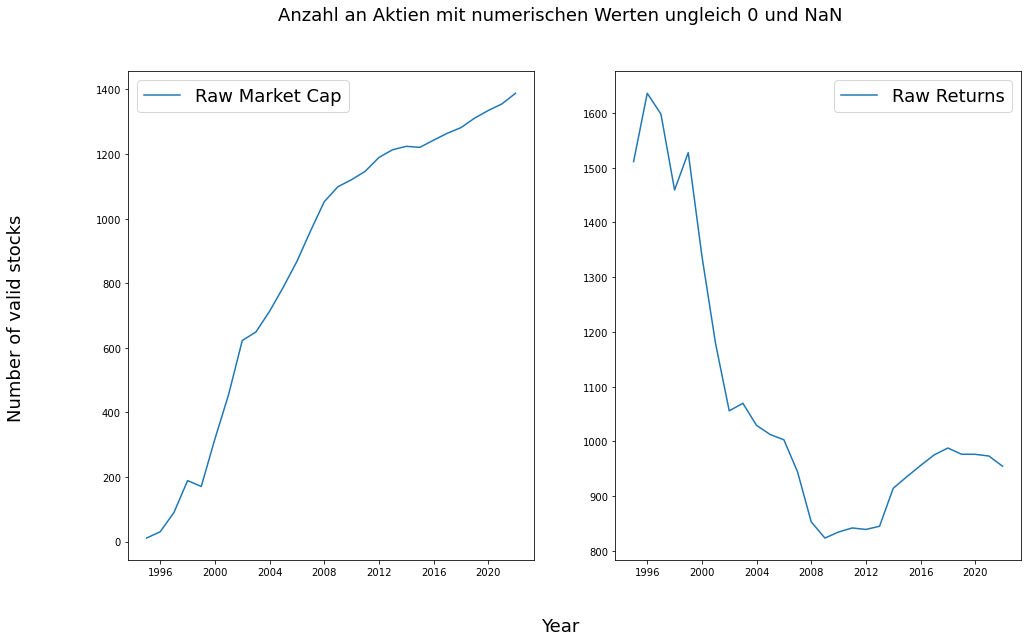

<Figure size 432x288 with 0 Axes>

In [12]:
# Visualisierung der Anzahl and numerischen Werten der Aktien
x_1 = np.sum(raw_marketcap.describe().iloc[0].to_numpy().reshape(28,12), axis=1)/12
x_2 = np.sum(raw_returns.isna().sum().to_numpy()[:-1].reshape(28,12), axis=1)/12
y = pd.date_range(start='1994', end='2022', freq='Y')

labels = ['Raw Market Cap' ,'Raw Returns']

fig, ax = plt.subplots(1, 2, figsize=(16,9))

ax[0].plot(y, x_1, label=labels[0])
ax[1].plot(y, x_2, label=labels[1])

ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)

fig.suptitle('Anzahl an Aktien mit numerischen Werten ungleich 0 und NaN', fontsize=18)
fig.supxlabel('Year', fontsize=18)
fig.supylabel('Number of valid stocks', fontsize=18)

plt.show()

plt.savefig('raw_daten_ungleich_null.png')


Datenvorbereitung

In [13]:
# Market cap
df_marketcap = raw_marketcap.copy()
df_marketcap = df_marketcap.set_index('RIC').T
df_marketcap.index = pd.to_datetime(df_marketcap.index, format='%d/%m/%Y')

# Return
df_returns = raw_returns.copy()
df_returns = df_returns.set_index('RIC').T
df_returns.index = pd.to_datetime(df_returns.index, format='%d/%m/%Y')

# Firmdata 
df_firmdata = raw_firmdata.copy()
df_firmdata['Date'] = pd.to_datetime(df_firmdata['Date'], format='%d/%m/%Y')

# Prepare data to create Dataframe for all results and calculate cumulative product sum

month_index = pd.to_datetime(df_returns.index, format='%d/%m/%Y')
strategy_column = []
strategy_list = []

# Define the range of years for the analysis
start_year = 10 # here: 2004
end_year = 27 # here: 2020 (2021, but will stop before this year)

if end_year > 27:
    end_year = 27
    print('Die Datensätze für die Anzahl der Mitarbeiter haben ein Jahr weniger, daher ist die maximale Anzahl an Jahren auf 27 limitiert.')

def cum_prodIndex(alpha):
    '''
    Calcultae the cumulative product of a numpy ndarray / here it's a 1D-array
    '''
    return ((alpha/100)+1).cumprod()

#### Cleaning-Technik

- wandle pandas-DataFrame in numpy array
    - pd-DF hat 336 Zeilen (336 Monate = 28 Jahre) und 1720 Spalten (Anzahl der verschiedenen Aktien)
    - um Aktien jaehrlich zu betrachten, werden die Zeilen in Jahren gruppiert: 28*12
        - Dadurch wird ein 3 Dimensionales Numpy array benoetigt, die erste Dimension gibt das jeweilige Jahr an, die zweite den jeweiligen Monat im Jahr und die dritte ist die Spalte fuer die jeweilige Aktie
    - Anschliessend wird ueber die Jahre in einer for-Schleife iteriert, so stellt man sicher, dass nur im jeweiligen Jahr Aktien rausgefiltert werden, die in mindestens einem Monat einen invaliden Wert haben (diese werden als np.nan definiert)
        - Aktien die also nur in wenigen Jahren invalide Werte haben, aber in anderen vollstaendig valide sind, koennen dann in den jeweiligen Jahren mitberuecksichtigt werden

- Alle Return Daten unter -100% werden aus offensichtlich logischen Grund rausgefiltert
- Auch werden Return daten ueber 101 % gefiltert, da der Beitrag von Aktien die einen monatlichen Return haben von ueber 101% marginal ist
- Return daten von 0% filtern wir ebenfalls aus, da keinerlei Aenderung von Monat zu Monat eher unwahrscheinlich ist. Insbesondere koennen bei der Datenbesorgung Fehlerhafte Daten zu Null gesetzt worden sein, und diese filtern wir dadurch aus 
    - Das Filtern setzen wir um, in dem wir die jeweiligen Daten nach den genannten bedingung zu np.nan definieren
    - Anschliessend wird eine numpy array liste erstellt in der die Spalten zu false gesetzt werden, die diese np.nan Werte beinhalten
    - mit Hilfe der Numpy Indexierung, erstellen wir ein numpy array aus dem Gesamt Array und werden die Spalten raus, mit einem False Wert
    - Dies wird jedes Jahr neu gemacht und es entsteht jedes Jahr eine andere Matrix, die Aktien speichern wir in eine Liste um spaeter nachverfolgen zu koennen, welche Aktien in welchem Jahr rausgefiltert wurden, dazu erstellen wir am ende ein Pandas DataFrame in der zu einem bestimmten Monat in jeder Spalte entweder True oder False gespeichert wird, True fuer Aktie ist drin und False fuer nicht

## Indexstrategien 

### 1. Market Cap Index

In [14]:
# Convert Data to numpy
nump_returns = df_returns.to_numpy().reshape(28,12,1720)
nump_marketcap = df_marketcap.to_numpy().reshape(28,12,1720)

# define an empty numpy array to store results
marketcap_index_return = np.arange(0)

# define list to save stocks
marketcap_stocks_list = []

# For each year, clean and filter the data and calculate the weight of the portfolio
for year in range(start_year, end_year):
    # Filter range
    nump_returns[nump_returns > 101] = np.nan
    nump_returns[nump_returns < -100] = np.nan
    nump_returns[nump_returns == 0] = np.nan
    nump_marketcap[nump_marketcap < 50] = np.nan
    
    # Filter nan values
    index_r = ~np.isnan(nump_returns[year,:,:]).any(axis=0)
    index_m = ~np.isnan(nump_marketcap[year,:,:]).any(axis=0)
    index = index_r * index_m
    
    # Delete nan values
    returns_clean = nump_returns[year,:,:][:, index]
    marketcap_clean = nump_marketcap[year,:,:][:, index]
    
    # Create DataFrame with cleaned Data for further inspections if needed
    marketcap_clean_df = pd.DataFrame(returns_clean, index=df_returns[year*12 : year*12 + 12].index, columns=df_returns.columns[index])
    marketcap_stocks_list.append(df_returns.columns[index])

    # Calculate weighted matrix
    weighted_market = (marketcap_clean.T * (1 / np.sum(marketcap_clean, axis=1))).T
    
    # Calculate market cap index return
    return_index = np.sum(returns_clean * weighted_market, axis=1)
    
    # Add returns to empty numpy array
    marketcap_index_return = np.hstack((marketcap_index_return, return_index))

# Add results into list
strategy_column.append('Market Cap Index')
strategy_list.append(marketcap_index_return)

# Calculate cumulative return of the results
cumulative_marketcap_return = cum_prodIndex(marketcap_index_return)

### 2. Random Index

In [15]:
# Convert Data to numpy
nump_returns = df_returns.to_numpy().reshape(28,12,1720)
nump_marketcap = df_marketcap.to_numpy().reshape(28,12,1720)

# define an empty numpy array to store results
random_index_return = np.arange(0)

# define list to save stocks
random_stocks_list = []

# For each year, clean and filter the data and calculate the weight of the portfolio
for year in range(start_year, end_year):
    # Filter range
    nump_returns[nump_returns > 101] = np.nan
    nump_returns[nump_returns < -100] = np.nan
    nump_returns[nump_returns == 0] = np.nan
    nump_marketcap[nump_marketcap < 50] = np.nan
    
    # Filter nan values
    index_r = ~np.isnan(nump_returns[year,:,:]).any(axis=0)
    index_m = ~np.isnan(nump_marketcap[year,:,:]).any(axis=0)
    index = index_r * index_m
    
    # Delete nan values
    returns_clean = nump_returns[year,:,:][:, index]
    marketcap_clean = nump_marketcap[year,:,:][:, index]

    # Create DataFrame with cleaned Data for further inspections if needed
    random_clean_df = pd.DataFrame(returns_clean, index=df_returns[year*12 : year*12 + 12].index, columns=df_returns.columns[index])
    random_stocks_list.append(df_returns.columns[index])

    # Get number of columns
    data_row, data_col = returns_clean.shape
    
    # Calculate weighted matrix
    w_matrix = np.zeros((data_row, data_col))
    random_weight = np.random.rand(1, data_col)
    w_matrix[0] = random_weight / np.sum(random_weight)

    for i in range(1, data_row):
        w_matrix[i] = (w_matrix[i-1] * (1 + returns_clean[i-1]/100)) / np.sum(w_matrix[i-1] * (1+ returns_clean[i-1]/100))

    # Calculate random index return
    return_index = np.sum(returns_clean * w_matrix, axis=1)
    
    # Add returns to empty numpy array
    random_index_return = np.hstack((random_index_return, return_index))

# Add results into list
strategy_column.append('Random Index')
strategy_list.append(random_index_return)

# Calculate cumulative return of the results
cumulative_random_return = cum_prodIndex(random_index_return)

### 3. Employee Index

In [16]:
# Import Employee Data
dfem = df_firmdata.drop(columns=['Total Equity', 'Company Market Cap', 'Revenue', 'Cash Dividend Paid, Common, Discrete'])
dfem['Full-Time Employees'] = dfem['Full-Time Employees'].apply(pd.to_numeric, errors='coerce')
pdfem = dfem.pivot(index='Date', columns=('RIC'))['Full-Time Employees'].reset_index()
pdfem.columns.name = None
pdfem = pdfem.set_index(pdfem['Date'])
pdfem = pdfem.drop(columns='Date')

# Convert Data to numpy
nump_returns = df_returns.to_numpy().reshape(28,12,1720)
nump_employees = pdfem.to_numpy()
new_row = np.arange(1720)*np.nan
nump_employees = (np.vstack((new_row, nump_employees))).reshape(28,1,1720)
nump_employees = np.repeat(nump_employees[:,0,:], 12, axis=0).reshape(28,12,1720)

# define an empty numpy array to store results
employee_index_return = np.arange(0)

# define list to save stocks
employee_stocks_list = []

# For each year, clean and filter the data and calculate the weight of the portfolio
for year in range(start_year, end_year):
    # Filter range
    nump_returns[nump_returns > 101] = np.nan
    nump_returns[nump_returns < -100] = np.nan
    nump_returns[nump_returns == 0] = np.nan
    nump_employees[nump_employees < 50] = np.nan
    
    # Filter nan values
    index_r = ~np.isnan(nump_returns[year,:,:]).any(axis=0)
    index_e = ~np.isnan(nump_employees[year,:,:]).any(axis=0)
    index = index_r  * index_e
    
    # Delete nan values
    returns_clean = nump_returns[year,:,:][:, index]
    employee_clean = nump_employees[year,:,:][:, index]
    
    # Create DataFrame with cleaned Data for further inspections if needed
    employee_clean_df = pd.DataFrame(returns_clean, index=df_returns[year*12 : year*12 + 12].index, columns=df_returns.columns[index])
    employee_stocks_list.append(df_returns.columns[index])

    # Get number of columns
    data_row, data_col = returns_clean.shape
    
    # Calculate weighted matrix
    w_matrix = np.zeros((data_row, data_col))
    w_matrix[0] = (employee_clean[0]) / np.sum(employee_clean[0])

    for i in range(1, data_row):
        w_matrix[i] = (w_matrix[i-1] * (1 + returns_clean[i-1]/100)) / np.sum(w_matrix[i-1] * (1+ returns_clean[i-1]/100))
    
    # Calculate employee index return
    return_index = np.sum(returns_clean * w_matrix, axis=1)
    
    # Add returns to empty numpy array
    employee_index_return = np.hstack((employee_index_return, return_index))

# Add results into list
strategy_column.append('Employee Index')
strategy_list.append(employee_index_return)
    
# Calculate cumulative return of the results
cumulative_employee_return = cum_prodIndex(employee_index_return)

### 4. Equal Index

In [17]:
# Convert Data to numpy
nump_returns = df_returns.to_numpy().reshape(28,12,1720)

# define an empty numpy array to store results
equal_index_return = np.arange(0)

# define list to save stocks
equal_stocks_list = []

# For each year, clean and filter the data and calculate the weight of the portfolio
for year in range(start_year, end_year):
    # Filter range
    nump_returns[nump_returns > 101] = np.nan
    nump_returns[nump_returns < -100] = np.nan
    nump_returns[nump_returns == 0] = np.nan
    nump_marketcap[nump_marketcap < 50] = np.nan
    
    # Filter nan values
    index_r = ~np.isnan(nump_returns[year,:,:]).any(axis=0)
    index_m = ~np.isnan(nump_marketcap[year,:,:]).any(axis=0)
    index = index_r * index_m
    
    # Delete nan values
    returns_clean = nump_returns[year,:,:][:, index]
    marketcap_clean = nump_marketcap[year,:,:][:, index]

    # Create DataFrame with cleaned Data for further inspections if needed
    equal_clean_df = pd.DataFrame(returns_clean, index=df_returns[year*12 : year*12 + 12].index, columns=df_returns.columns[index])
    equal_stocks_list.append(df_returns.columns[index])
              
    # Get number of columns
    data_row, data_col = returns_clean.shape
    
    # Calculate weighted matrix
    w_matrix = 1 / returns_clean.shape[1]

    # Calculate random index return
    return_index = np.sum(returns_clean * w_matrix, axis=1)
    
    # Add returns to empty numpy array
    equal_index_return = np.hstack((equal_index_return, return_index))

# Add results into list
strategy_column.append('Equal Index')
strategy_list.append(equal_index_return)

# Calculate cumulative return of the results
cumulative_equal_return = cum_prodIndex(equal_index_return)

### 5. Book Value Index

In [18]:
# Import Total Equity Data
dfem = df_firmdata.drop(columns=['Full-Time Employees', 'Company Market Cap', 'Revenue', 'Cash Dividend Paid, Common, Discrete'])
dfem['Total Equity'] = dfem['Total Equity'].apply(pd.to_numeric, errors='coerce')
pdfem = dfem.pivot(index='Date', columns=('RIC'))['Total Equity'].reset_index()
pdfem.columns.name = None
pdfem = pdfem.set_index(pdfem['Date'])
pdfem = pdfem.drop(columns='Date')

# Convert Data to numpy
nump_returns = df_returns.to_numpy().reshape(28,12,1720)
nump_equity = pdfem.to_numpy()
new_row = np.arange(1720)*np.nan
nump_equity = (np.vstack((new_row, nump_equity))).reshape(28,1,1720)
nump_equity = np.repeat(nump_equity[:,0,:], 12, axis=0).reshape(28,12,1720)

# define an empty numpy array to store results
bookv_index_return = np.arange(0)

# define list to save stocks
bookvalue_stocks_list = []

# For each year, clean and filter the data and calculate the weight of the portfolio
for year in range(start_year, end_year):
    # Filter range
    nump_returns[nump_returns > 101] = np.nan
    nump_returns[nump_returns < -100] = np.nan
    nump_returns[nump_returns == 0] = np.nan
    nump_equity[nump_equity < 20] = np.nan
    
    # Filter nan values
    index_r = ~np.isnan(nump_returns[year,:,:]).any(axis=0)
    index_e = ~np.isnan(nump_equity[year,:,:]).any(axis=0)
    index = index_r  * index_e
    
    # Delete nan values
    returns_clean = nump_returns[year,:,:][:, index]
    equity_clean = nump_equity[year,:,:][:, index]
    
    # Create DataFrame with cleaned Data for further inspections if needed
    equity_clean_df = pd.DataFrame(returns_clean, index=df_returns[year*12 : year*12 + 12].index, columns=df_returns.columns[index])
    bookvalue_stocks_list.append(df_returns.columns[index])
    
    # Get number of columns
    data_row, data_col = returns_clean.shape
    
    # Calculate weighted matrix
    w_matrix = np.zeros((data_row, data_col))
    w_matrix[0] = (equity_clean[0]) / np.sum(equity_clean[0])

    for i in range(1, data_row):
        w_matrix[i] = (w_matrix[i-1] * (1 + returns_clean[i-1]/100)) / np.sum(w_matrix[i-1] * (1+ returns_clean[i-1]/100))
    
    # Calculate employee index return
    return_index = np.sum(returns_clean * w_matrix, axis=1)
    
    # Add returns to empty numpy array
    bookv_index_return = np.hstack((bookv_index_return, return_index))

# Add results into list
strategy_column.append('Book Value Index')
strategy_list.append(bookv_index_return)
    
# Calculate cumulative return of the results
cumulative_bookv_return = cum_prodIndex(bookv_index_return)

### 6. Minimum Variance Index

In [19]:
### simulate portfolios with randomly generated weights

nump_mvd = df_returns.to_numpy().reshape(28,12,1720) #Pandas Dataframe which includes all stocks with returns monthly
nump_marketcap = df_marketcap.to_numpy().reshape(28,12,1720)
annual_mriskfree =  0.012141176470588242 #Risikofreien Zinssatzes für entwickelte Märkte und der entsprechenden Sharpe Ratio

# define an empty numpy array to store results
min_variance_index_return = np.arange(0)

# define list to save stocks
minvariance_stocks_list = []

for year in range(start_year, end_year):
    
    # Filter range
    nump_mvd[nump_mvd > 101] = np.nan
    nump_mvd[nump_mvd < -100] = np.nan
    nump_mvd[nump_mvd == 0] = np.nan
    nump_marketcap[nump_marketcap < 50] = np.nan
    
    # Filter nan values
    index_r = ~np.isnan(nump_mvd[year,:,:]).any(axis=0)
    index_m = ~np.isnan(nump_marketcap[year,:,:]).any(axis=0)
    index = index_r * index_m
        
    # Delete nan values
    mvd_clean = nump_mvd[year,:,:][:, index]

    # Create DataFrame with cleaned Data for further inspections if needed
    mvd_clean_df = pd.DataFrame(mvd_clean, index=df_returns[year*12 : year*12 + 12].index, columns=df_returns.columns[index])
    minvariance_stocks_list.append(df_returns.columns[index])
    
    ### Calculate weighted matrix
    df_mvd_clean = pd.DataFrame(mvd_clean)

    mus = (1+np.mean(df_mvd_clean/100)**12)-1 #mus = (1+np.mean(mvd_clean/100))**12-1  hoch 12 weg, da wir nicht auf jaehrlich normieren
    sigma = ((df_mvd_clean/100).cov()*12).to_numpy() #sigma = ((mvd_clean/100).cov()*12).to_numpy() so wie oben

    def portfolio_risk(weights, sigma):
        risk_temp = np.matmul(np.matmul(weights, sigma), weights.T)
        return risk_temp[0][0]

    # 2. portfolio return (with inputs "weights" and "mus")
    def portfolio_return(weights, mus):
        return_temp = np.matmul(weights, mus)
        return return_temp[0]

    num_portfolios = 100000  # amount of portfolios

    # use this to save the simulated data (return, risk, sharpe ratio)

    results = pd.DataFrame(columns=['PF_number',"std_dev", 'return', 'sharp_ratio', 'weights'], index = range(0,num_portfolios))
    results["PF_number"] = range(0,num_portfolios)
    results.set_index("PF_number",inplace=True)

    # use this to track your weights

    col_n = len(df_mvd_clean.columns)

    # now simulate random weights and calculate portfolio risk, return and sharpe ratio
    for i in range(num_portfolios):
        weights = np.random.rand(1,col_n)
        weights = weights/np.sum(weights)
        #weights_record.append(weights)
        results.iloc[i]['std_dev'] = portfolio_risk(weights, sigma)
        results.iloc[i]['return'] = portfolio_return(weights, mus)
        results.iloc[i]['weights'] = weights
        results.iloc[i]['sharp_ratio'] = (results.iloc[i]['return']-annual_mriskfree)/results.iloc[i]['std_dev']

    max_sr_portfolio = results[results['sharp_ratio'] == max(results['sharp_ratio'])]
    min_var_portfolio = results[results['std_dev'] == min(results['std_dev'])]

    weighted_min_variance = min_var_portfolio['weights'].to_numpy()[0][0]

    w_matrix = np.zeros((12, col_n))
    w_matrix[0] = weighted_min_variance

    for i in range(1, 12):
        w_matrix[i] = (w_matrix[i-1] * (1 + mvd_clean[i-1]/100)) / np.sum(w_matrix[i-1] * (1+ mvd_clean[i-1]/100))

    # Calculate market cap index return
    return_index = np.sum(mvd_clean * weighted_min_variance, axis=1)
    
    # Add returns to empty numpy array
    min_variance_index_return = np.hstack((min_variance_index_return, return_index))

# Add results into list
strategy_column.append('Minimum Variance Index')
strategy_list.append(min_variance_index_return)
 
# Calculate cumulative return of the results
cumulative_minvariance_return = cum_prodIndex(min_variance_index_return)

### Speichern der Ergebnisse in einen pandas DataFrame

In [20]:
# Create Dataframe for returns of each index strategy and export as csv
index_return_data = {index:data for index, data in zip(strategy_column, strategy_list)}
smart_beta = pd.DataFrame(index_return_data, index=month_index[start_year*12:start_year*12 + (end_year - start_year)*12])
#smart_beta.to_csv('smart_betas_2023_07_31.csv')

# Create Dataframes for each index containing for each year the analyzed stocks
start_date = pd.to_datetime('2004-01-31')
end_date = pd.to_datetime('2020-12-31')

returns_sb = df_returns[(df_returns.index >= start_date) & (df_returns.index <= end_date)]
returns_sb = returns_sb[returns_sb == 0]
returns_sb = returns_sb.fillna(0)

stocks_lists = [marketcap_stocks_list, random_stocks_list, employee_stocks_list, equal_stocks_list, bookvalue_stocks_list, minvariance_stocks_list]
cleaned_returns = [returns_sb.copy() for _ in range(len(stocks_lists))]

j = 0 

for clean_ret in cleaned_returns:
    year = '2004'
    for i in range((end_year-start_year)):
        cleaned_returns[j].loc[str(int(year) + i), stocks_lists[j][i]] = 1
    j += 1


Plot Total Cumulative Return

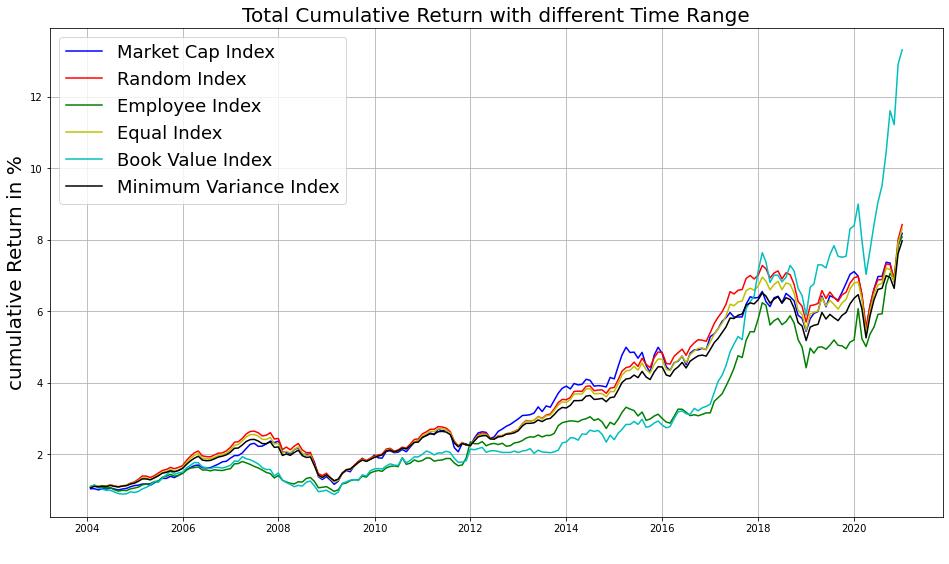

<Figure size 432x288 with 0 Axes>

In [21]:
# Plot cumulative returns of indices
# Define range for x axis 
x_achse = df_returns.index[start_year*12 : start_year*12 + (end_year - start_year)*12]

# Define color for bar plots
goldengreen = "#FFD700"
color_bar = ['blue', 'red', 'green', 'yellow', 'cyan']

# Preparing Data for plot
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(x_achse, cumulative_marketcap_return, 'b', label='Market Cap Index')
ax.plot(x_achse, cumulative_random_return, 'r', label='Random Index')
ax.plot(x_achse, cumulative_employee_return, 'g', label='Employee Index')
ax.plot(x_achse, cumulative_equal_return, 'y', label='Equal Index')
ax.plot(x_achse, cumulative_bookv_return, 'c', label='Book Value Index')
ax.plot(x_achse, cumulative_minvariance_return, 'k', label='Minimum Variance Index')

ax.set_xlabel(' ', fontsize=20)
ax.set_ylabel('cumulative Return in %', fontsize=20)


ax.legend(fontsize=18)  # Ändere die Schriftgröße der Legende


ax.set(xlabel=' ', ylabel='cumulative Return in %', title='Total Cumulative Return with different Time Range')
ax.set_title('Total Cumulative Return with different Time Range', fontsize=20)
#ax.legend()
ax.grid()

plt.show()



plt.savefig('cumulative_return_indices')

Anzahl Aktien im jeweiligen Jahr und Index nach Bereinigung

In [22]:
# Print Number of valid stocks
for i in range(len(marketcap_stocks_list)):
    print("Im Jahr {} gibt es: Marketcap: {}, Random: {}, Employee: {}, Equal: {}, BookValue: {}, MinVariance: {}".format(str(int(2004) + i),len(marketcap_stocks_list[i]), len(random_stocks_list[i]), len(employee_stocks_list[i]), len(equal_stocks_list[i]), len(bookvalue_stocks_list[i]), len(minvariance_stocks_list[i])))

Im Jahr 2004 gibt es: Marketcap: 195, Random: 195, Employee: 225, Equal: 195, BookValue: 169, MinVariance: 195
Im Jahr 2005 gibt es: Marketcap: 215, Random: 215, Employee: 232, Equal: 215, BookValue: 166, MinVariance: 215
Im Jahr 2006 gibt es: Marketcap: 256, Random: 256, Employee: 274, Equal: 256, BookValue: 207, MinVariance: 256
Im Jahr 2007 gibt es: Marketcap: 272, Random: 272, Employee: 337, Equal: 272, BookValue: 261, MinVariance: 272
Im Jahr 2008 gibt es: Marketcap: 240, Random: 240, Employee: 352, Equal: 240, BookValue: 297, MinVariance: 240
Im Jahr 2009 gibt es: Marketcap: 224, Random: 224, Employee: 325, Equal: 224, BookValue: 273, MinVariance: 224
Im Jahr 2010 gibt es: Marketcap: 255, Random: 255, Employee: 314, Equal: 255, BookValue: 265, MinVariance: 255
Im Jahr 2011 gibt es: Marketcap: 274, Random: 274, Employee: 334, Equal: 274, BookValue: 279, MinVariance: 274
Im Jahr 2012 gibt es: Marketcap: 277, Random: 277, Employee: 337, Equal: 277, BookValue: 281, MinVariance: 277
I

In [23]:
# Prepare Data to plot number of valid stocks
marcap_counts = []
random_counts = []
employee_counts = []
equal_counts = []
bookvalue_counts = []
minvariance_counts = []

for i in range(len(marketcap_stocks_list)):
    marcap_counts.append(len(marketcap_stocks_list[i]))
    random_counts.append(len(random_stocks_list[i]))
    employee_counts.append(len(employee_stocks_list[i])) 
    equal_counts.append(len(equal_stocks_list[i]))
    bookvalue_counts.append(len(bookvalue_stocks_list[i]))
    minvariance_counts.append(len(minvariance_stocks_list[i]))

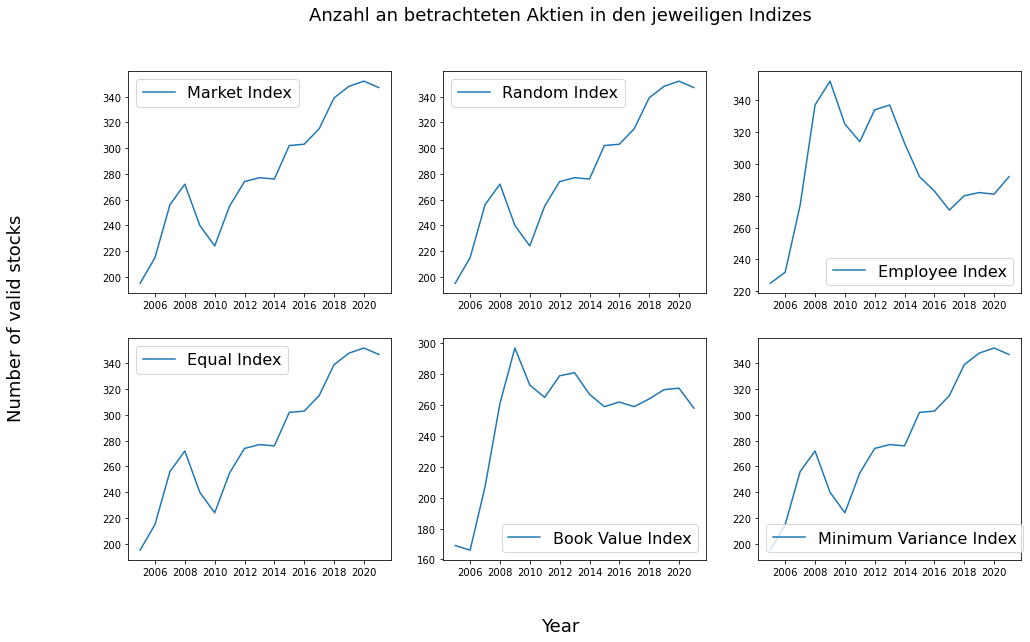

<Figure size 432x288 with 0 Axes>

In [24]:
# Plot Data
counts_list = [marcap_counts, random_counts, employee_counts, equal_counts, bookvalue_counts, minvariance_counts]

x = pd.date_range(start='2004', end='2021', freq='Y')
labels = ['Market Index' ,'Random Index', 'Employee Index', 'Equal Index', 'Book Value Index', 'Minimum Variance Index']

fig, ax = plt.subplots(2, 3, figsize=(16,9))

ax[0, 0].plot(x, counts_list[0], label=labels[0])
ax[0, 1].plot(x, counts_list[1], label=labels[1])
ax[0, 2].plot(x, counts_list[2], label=labels[2])
ax[1, 0].plot(x, counts_list[3], label=labels[3])
ax[1, 1].plot(x, counts_list[4], label=labels[4])
ax[1, 2].plot(x, counts_list[5], label=labels[5])

ax[0, 0].legend(fontsize=16)
ax[0, 1].legend(fontsize=16)
ax[0, 2].legend(fontsize=16)
ax[1, 0].legend(fontsize=16)
ax[1, 1].legend(fontsize=16)
ax[1, 2].legend(fontsize=16)

fig.suptitle('Anzahl an betrachteten Aktien in den jeweiligen Indizes', fontsize=18)
fig.supxlabel('Year', fontsize=18)
fig.supylabel('Number of valid stocks', fontsize=18)

plt.show()

plt.savefig('counts_valid_stocks')

# Statistische Analyse

Im Folgenden werden die verschiedene Portfolios (Indizes) auf der Grundlage ihrer statistischen Leistung verglichen. Die Ergebnisse des Vergleichs zwischen den verschiedenen Indizes sind in den folgenden 6 Teilen zu betrachten.

1. Annualized Return
2. Annualized Volatility
3. Value at Risk
4. Sharpe Ratio
5. Max Drawdown
6. Positive Months
7. CAPM
8. Fama French Drei-Faktoren Modell
9. Fama French Fünf-Faktoren Modell

### 1. Annualized Return

Book Value Index          0.164469
Random Index              0.133553
Equal Index               0.132623
Market Cap Index          0.131598
Employee Index            0.130760
Minimum Variance Index    0.129881
dtype: float64


Text(0, 0.5, 'Annual Return')

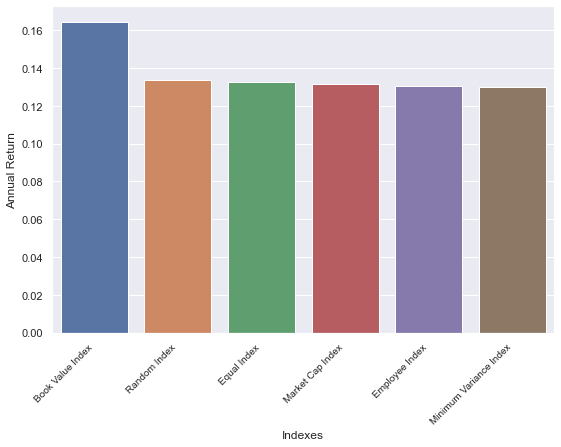

In [57]:
# Jährliche Rendite wird berechnet
goldengreen = "#FFD700"
color_bar = ['#0000FF', '#3399FF', '#6699FF', '#0099FF', '#3366FF', '#66CCFF']

annual_ret = sb.annualize_rets(smart_beta/100).sort_values(ascending = False)
type(annual_ret)
print(annual_ret)
plt.figure(figsize=(9, 6))
ax = sns.barplot(x=annual_ret.index, y=annual_ret.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment = "right", fontsize = "small",
fontweight = "light")
plt.xlabel("Indexes")
plt.ylabel("Annual Return")



### 2. Annualized Volatility

Market Cap Index          0.176852
Random Index              0.155743
Employee Index            0.179703
Equal Index               0.156069
Book Value Index          0.200674
Minimum Variance Index    0.137685
dtype: float64


Text(0, 0.5, 'Annual Volatility')

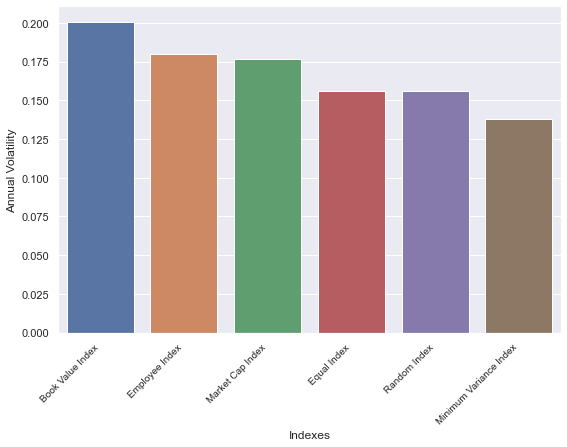

In [59]:
# Jährliche Risiko wird berechnet
annual_vol = sb.annualize_vol(smart_beta/100).sort_values(ascending = False)
print(sb.annualize_vol(smart_beta/100))
plt.figure(figsize=(9, 6))
ax = sns.barplot(x=annual_vol.index, y=annual_vol.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment = "right", fontsize = "small",
fontweight = "light")
plt.xlabel("Indexes")
plt.ylabel("Annual Volatility")


### 3. Value at Risk
Der Cornish-Fisher-Korrekturfaktor wird verwendet, um mögliche Abweichungen von der Normalverteilung zu berücksichtigen. Da die Renditen der Indizes ab 2018 normal verteilt sind, wird diese Methode verwendet, um das Risiko der Indizes besser zu verstehen. Die Prüfung auf Normalität erfolgt an der nächsten Zelle.


Market Cap Index          0.079443
Random Index              0.069236
Employee Index            0.063605
Equal Index               0.069256
Book Value Index          0.073728
Minimum Variance Index    0.060583
dtype: float64


Text(0, 0.5, 'Value at Risk')

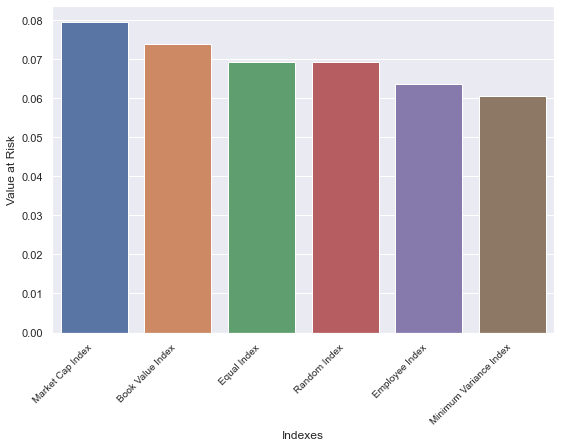

In [60]:
#VaR Gaussian mit Cornish-Fisher-Modifikation
value_risk = sb.var_gaussian(smart_beta/100).sort_values(ascending = False)
print(sb.var_gaussian(smart_beta/100, level=5))

plt.figure(figsize=(9, 6))
ax = sns.barplot(x=value_risk.index, y=value_risk.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment = "right", fontsize = "small",
fontweight = "light")
plt.xlabel("Indexes")
plt.ylabel("Value at Risk")


#### Normalität der Verteilung

In [30]:
#Check für die Normalität der Verteilung mit einem Konfidenzniveau von 5%
#True bedeutet normal
print("Alle Jahre : sind die Rendite abnormal verteilt")
for index in smart_beta:
    print(sb.is_normal(smart_beta[index]))

print("Ab Jahre 2018 : sind die Rendite normal verteilt")

for index in smart_beta:
    print(sb.is_normal(smart_beta["2018":][index]))


Alle Jahre : sind die Rendite abnormal verteilt
False
False
False
False
False
False
Ab Jahre 2018 : sind die Rendite normal verteilt
True
True
True
True
True
True


In [31]:
#Skewness
sb.skewness(smart_beta)

Market Cap Index         -0.766637
Random Index             -0.766884
Employee Index            0.496482
Equal Index              -0.771515
Book Value Index          0.325075
Minimum Variance Index   -0.826150
dtype: float64

In [32]:
#duble check
scipy.stats.skew(smart_beta)

array([-0.766637  , -0.76688385,  0.49648239, -0.77151488,  0.32507504,
       -0.82614967])

In [33]:
#Kurtosis
sb.kurtosis(smart_beta)

Market Cap Index          6.094274
Random Index              5.532415
Employee Index            5.268148
Equal Index               5.825599
Book Value Index          4.255376
Minimum Variance Index    6.012061
dtype: float64

### 4. Sharpe Ratio

Date      0
Mkt-RF    0
SMB       0
HML       0
RF        0
dtype: int64
0.012141176470588242
Market Cap Index         -0.121075
Random Index             -0.126198
Employee Index           -0.123175
Equal Index              -0.131157
Book Value Index          0.036517
Minimum Variance Index   -0.165853
dtype: float64


Text(0, 0.5, 'Sharpe Ratio')

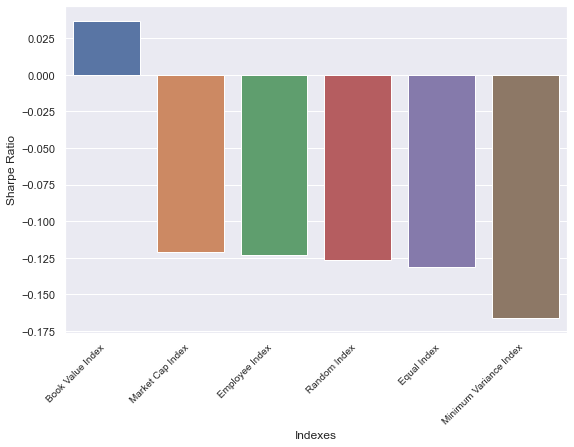

In [61]:
#Das Hochladen von Famafrench Daten zur Berechnung des risikofreien Zinssatzes für entwickelte Märkte und der entsprechenden Sharpe Ratio
path_to_fama = r'raw_french_fama/'

adr_famafrench = 'Europe_3_Factors.csv'
raw_famafrench = pd.read_csv(path_to_fama + adr_famafrench)
df_famafrench = raw_famafrench.copy()

missing_values = df_famafrench.isna()
missing_values_count = missing_values.sum()
print(missing_values_count)

df_famafrench.set_index("Date", inplace=True)
df_famafrench.index = pd.to_datetime(df_famafrench.index, format='%Y%m').to_period("M")
df_famafrench = df_famafrench["2004":"2020"]


risk_free_rate = (np.mean(df_famafrench["RF"])*12)/100
print(risk_free_rate)
print(sb.sharpe_ratio_r(smart_beta/100))
sharpe_ratio = sb.sharpe_ratio_r(smart_beta/100).sort_values(ascending = False)




plt.figure(figsize=(9, 6))
ax = sns.barplot(x=sharpe_ratio.index, y=sharpe_ratio.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment = "right", fontsize = "small",
fontweight = "light")
plt.xlabel("Indexes")
plt.ylabel("Sharpe Ratio")

Market Cap Index         -1.200241
Random Index             -1.353293
Employee Index           -1.184411
Equal Index              -1.354755
Book Value Index         -0.940565
Minimum Variance Index   -1.549426
dtype: float64


Text(0, 0.5, 'Sharpe Ratio')

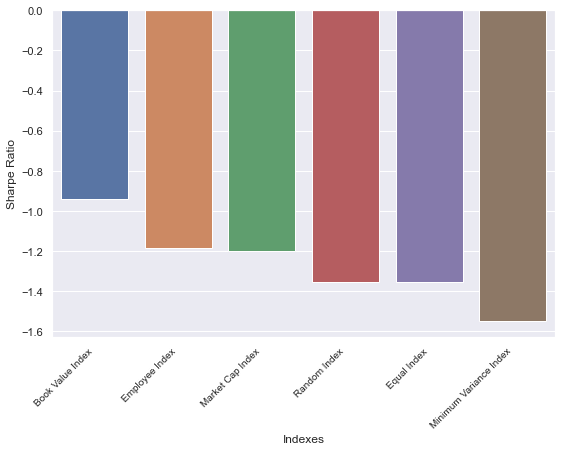

In [64]:
#Anhand jährliche Rendite und Risiko wird Sharp Ratio berechnet - Risikofrei von 0.03 wurde angenommen.

print(sb.sharpe_ratio(smart_beta/100))
sharpe_ratio_3 = sb.sharpe_ratio(smart_beta/100).sort_values(ascending = False)




plt.figure(figsize=(9, 6))
ax = sns.barplot(x=sharpe_ratio_3.index, y=sharpe_ratio_3.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment = "right", fontsize = "small",
fontweight = "light")
plt.xlabel("Indexes")
plt.ylabel("Sharpe Ratio")

### 5. Maximum Drawdown 

Das Maximum Drawdown (maximaler Verlust) ist eine Metrik im Portfoliomanagement, die den maximalen Rückgang des Werts eines Anlageportfolios oder einer Anlagestrategie über einen bestimmten Zeitraum hinweg misst. Es gibt Aufschluss darüber, wie stark das Portfolio während eines bestimmten Zeitraums an Wert verloren hat.

No handles with labels found to put in legend.


Max Drawdown von Market Cap Index : -0.51
Max Drawdown von Random Index : -0.5264
Max Drawdown von Employee Index : -0.4646
Max Drawdown von Equal Index : -0.5201
Max Drawdown von Book Value Index : -0.5469
Max Drawdown von Minimum Variance Index : -0.4782


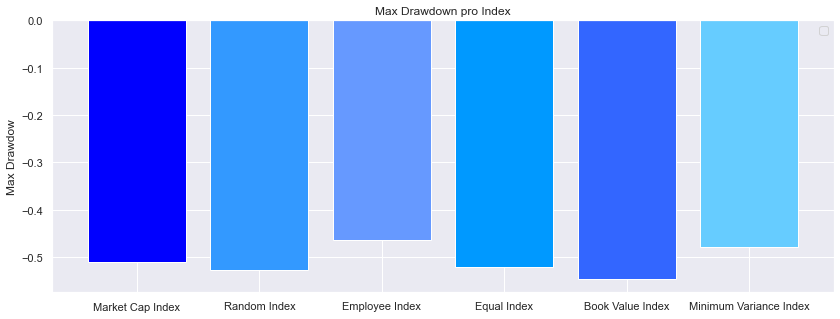

In [67]:

max_drawdown = {}
max_drawdown_monatlich = {}
for spalte in smart_beta:
    max_drawdown[spalte] = round(sb.drawdown(smart_beta[spalte]/100)['Drawdown'].min(), 4)
    max_drawdown_monatlich[spalte] = sb.drawdown(smart_beta[spalte]/100)['Drawdown']

# Ausgabe der Ergebnisse
for spalte, anzahl in max_drawdown.items():
    print("Max Drawdown von", spalte, ":", anzahl)


fig, ax = plt.subplots(figsize=(14,5))

ax.bar(max_drawdown.keys(),  max_drawdown.values(), color = color_bar)

ax.set_ylabel('Max Drawdow')
ax.set_title("Max Drawdown pro Index")
ax.legend(title='')

plt.show()


#### Das Maximum Drawdown für die letzten Zehn Jahren

No handles with labels found to put in legend.


Max Drawdown von Market Cap Index : -0.2342
Max Drawdown von Random Index : -0.2423
Max Drawdown von Employee Index : -0.2915
Max Drawdown von Equal Index : -0.2303
Max Drawdown von Book Value Index : -0.2299
Max Drawdown von Minimum Variance Index : -0.2045


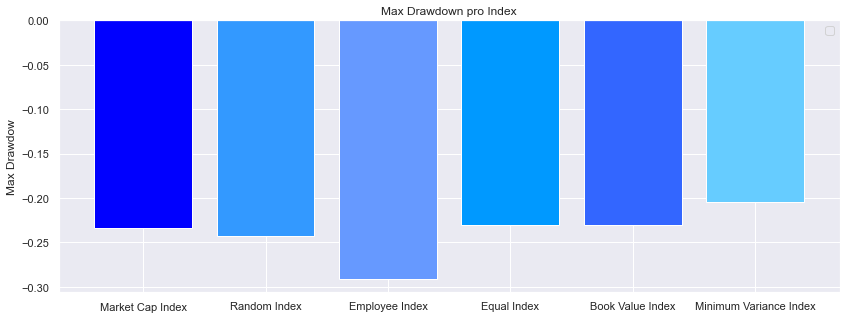

In [68]:
smart_beta_letzte_10_Jahren = smart_beta["2010":"2020"]

max_drawdown_10 = {}
max_drawdown_monatlich_10 = {}
for spalte in smart_beta_letzte_10_Jahren:
    max_drawdown_10[spalte] = round(sb.drawdown(smart_beta_letzte_10_Jahren[spalte]/100)['Drawdown'].min(), 4)
    max_drawdown_monatlich_10[spalte] = sb.drawdown(smart_beta_letzte_10_Jahren[spalte]/100)['Drawdown']

# Ausgabe der Ergebnisse
for spalte, anzahl in max_drawdown_10.items():
    print("Max Drawdown von", spalte, ":", anzahl)


fig, ax = plt.subplots(figsize=(14,5))

ax.bar(max_drawdown_10.keys(),  max_drawdown_10.values(), color = color_bar)

ax.set_ylabel('Max Drawdow')
ax.set_title('Max Drawdown pro Index')
ax.legend(title='')

plt.show()


<AxesSubplot:>

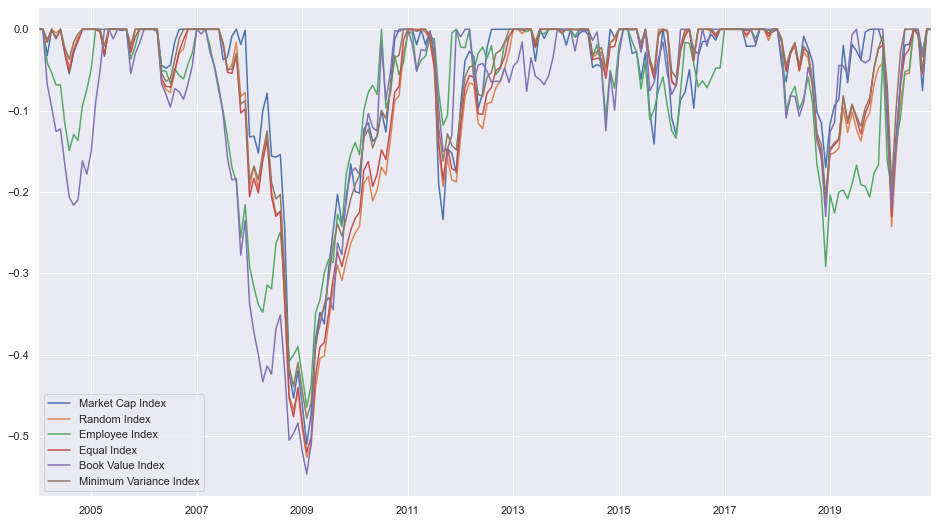

In [38]:
# Maxdrawdown alle Jahren Plotten
max_drawdown_monatlich_df = pd.DataFrame(max_drawdown_monatlich)
max_drawdown_monatlich_df.plot(figsize = (16,9))


### 6. Positive Months

No handles with labels found to put in legend.


Anzahl der positiven Monate in Market Cap Index : 133
Anzahl der positiven Monate in Random Index : 137
Anzahl der positiven Monate in Employee Index : 122
Anzahl der positiven Monate in Equal Index : 136
Anzahl der positiven Monate in Book Value Index : 118
Anzahl der positiven Monate in Minimum Variance Index : 140


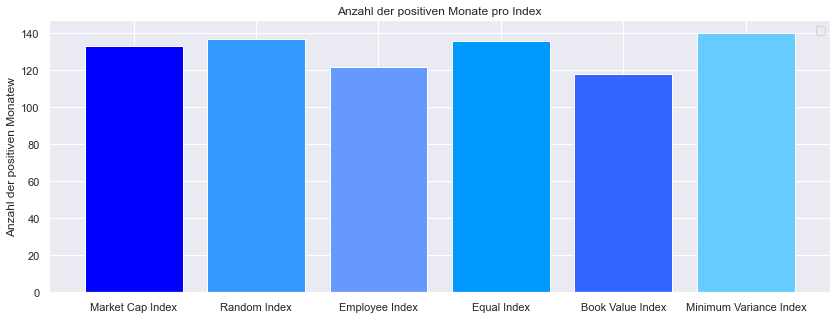

In [39]:
# Berechnung der Anzahl der positiven Monate für jede Spalte

anzahl_positive = {}
for spalte in smart_beta:
    anzahl_positive[spalte] = sum(smart_beta[spalte] > 0)

# Ausgabe der Ergebnisse
for spalte, anzahl in anzahl_positive.items():
    print("Anzahl der positiven Monate in", spalte, ":", anzahl)

fig, ax = plt.subplots(figsize=(14,5))

ax.bar(anzahl_positive.keys(),  anzahl_positive.values(), color = color_bar)

ax.set_ylabel('Anzahl der positiven Monatew')
ax.set_title('Anzahl der positiven Monate pro Index')
ax.legend(title='')

plt.show()    


### 7. CAPM

In [40]:
#Dataframes für das Kombinieren Vorbereiten. Merging Fama French Faktoren mit Indizes

smart_beta.to_period("M")
smart_beta.index.name = 'Date'
print(df_famafrench.shape, smart_beta.shape)
merge = pd.merge(smart_beta.to_period("M"), df_famafrench, on = "Date")

#Name der Indizes
stocks = merge.columns[0:6]
stocks

merge["MktRF"] = merge["Mkt-RF"]
merge.drop(columns="Mkt-RF", inplace=True)

df = merge.copy()


(204, 4) (204, 6)


In [41]:
stocks

Index(['Market Cap Index', 'Random Index', 'Employee Index', 'Equal Index',
       'Book Value Index', 'Minimum Variance Index'],
      dtype='object')

In [42]:
#Regression_CAPM

reg_dict_capm = {}



for stock in stocks:
    df["assetex"] = df[stock] - df["RF"]
    model = smf.ols('assetex ~ 1 + MktRF', data=df)
    model = model.fit().summary()
    reg_dict_capm[stock] = model

In [43]:
reg_dict_capm

{'Market Cap Index': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                assetex   R-squared:                       0.727
 Model:                            OLS   Adj. R-squared:                  0.726
 Method:                 Least Squares   F-statistic:                     538.1
 Date:                Tue, 24 Oct 2023   Prob (F-statistic):           7.23e-59
 Time:                        10:42:13   Log-Likelihood:                -489.21
 No. Observations:                 204   AIC:                             982.4
 Df Residuals:                     202   BIC:                             989.1
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------

### 8. Fama French Drei-Faktoren Modell

#### Fama French Formula 
R_i - R_f = β_i(R_M - R_f) + s_i(SMB) + h_i(HML) + ε_i


In [44]:
#Erstellen Sie ein leeres Dictionary.

reg_dict_3ff = {}



for stock in stocks:
    df["assetex"] = df[stock] - df["RF"]
    model = smf.ols('assetex ~ 1 + MktRF+ SMB + HML', data=df)
    model = model.fit().summary()
    reg_dict_3ff[stock] = model
    
    

In [45]:
reg_dict_3ff

{'Market Cap Index': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                assetex   R-squared:                       0.729
 Model:                            OLS   Adj. R-squared:                  0.725
 Method:                 Least Squares   F-statistic:                     179.7
 Date:                Tue, 24 Oct 2023   Prob (F-statistic):           1.66e-56
 Time:                        10:42:13   Log-Likelihood:                -488.34
 No. Observations:                 204   AIC:                             984.7
 Df Residuals:                     200   BIC:                             998.0
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------

In [46]:
# Double check und für plotten

df["MktminusRF"] = df["Market Cap Index"] - df["RF"]
y_marketcap = df["MktminusRF"] 
X = df[["MktRF", "SMB", "HML"]]
X_sm = sm.add_constant(X)



df["RandomminusRF"] = df["Random Index"] - df["RF"]
y_random = df["RandomminusRF"] 


df["EmployeeeminusRF"] = df["Employee Index"] - df["RF"]
y_employee = df["EmployeeeminusRF"] 


df["EqualminusRF"] = df["Equal Index"] - df["RF"]
y_equal = df["EqualminusRF"] 



df["BookvalueminusRF"] = df["Book Value Index"] - df["RF"]
y_bookvalue = df["BookvalueminusRF"] 


df["MinvarminusRF"] = df["Minimum Variance Index"] - df["RF"]
y_minvar = df["MinvarminusRF"] 

variable_list = [y_marketcap, y_random, y_employee, y_equal, y_bookvalue, y_minvar]

C:\Users\sahar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


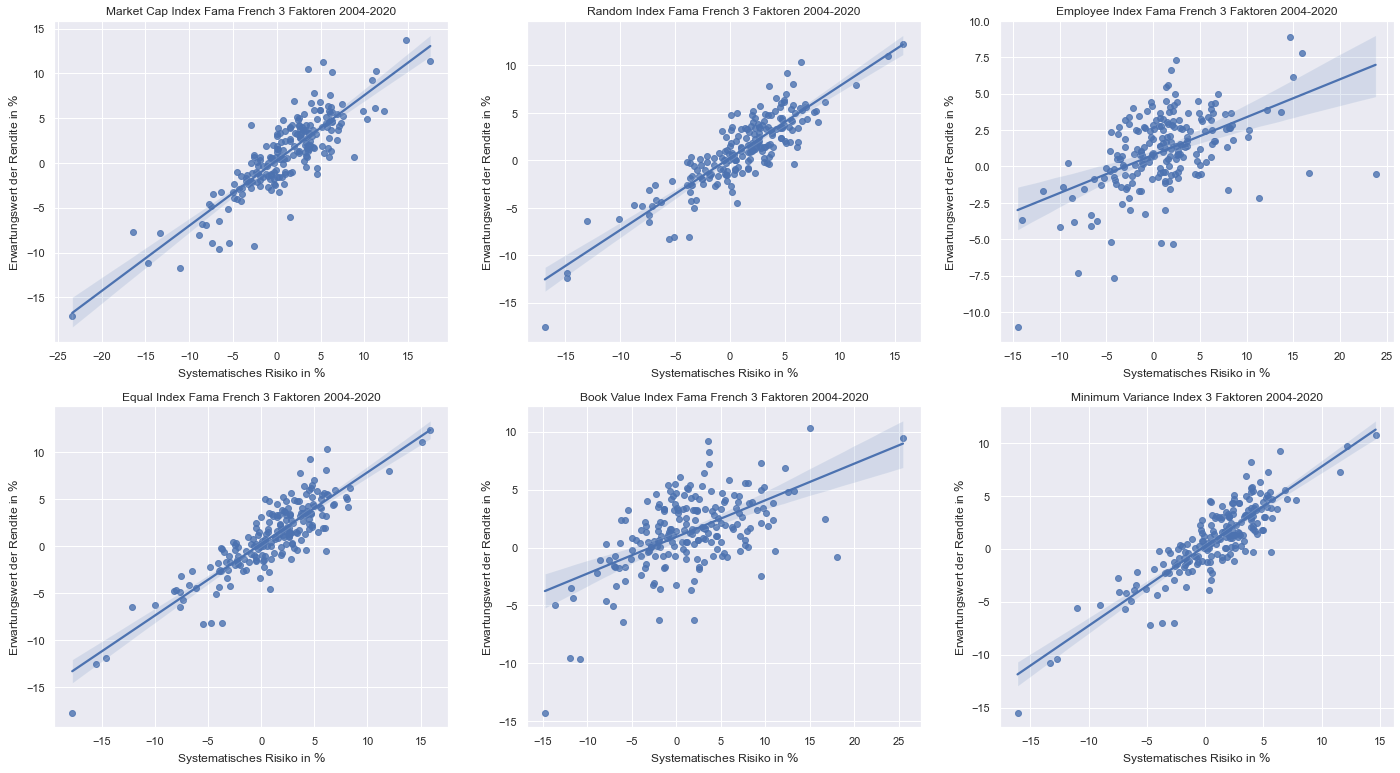

In [47]:
# Streudiagramm und Regressionslinie plotten

fig, axs = plt.subplots(2,3, figsize=(24,13))

title_names = title_names = ["Market Cap Index Fama French 3 Faktoren 2004-2020", "Random Index Fama French 3 Faktoren 2004-2020", "Employee Index Fama French 3 Faktoren 2004-2020", "Equal Index Fama French 3 Faktoren 2004-2020", "Book Value Index Fama French 3 Faktoren 2004-2020", "Minimum Variance Index 3 Faktoren 2004-2020"]
i = 0
n = 0
for variable in variable_list:
    model2 = sm.OLS(variable, X_sm)
    results = model2.fit()
    y_observed = variable
    y_predicted = results.predict(X_sm)

    sns.regplot(x=y_observed, y=y_predicted, data=results, ax=axs[n,i]);
    axs[n, i].set_xlabel('Systematisches Risiko in $\%$')
    axs[n, i].set_ylabel('Erwartungswert der Rendite in $\%$')
    axs[n, i].set_title(title_names[i+n*3])
    i = i + 1
    if i > 2:
        n = 1
        i = 0
        
plt.savefig('beispiel_graph.png')


### 9. Fama French 5 Faktoren

In [48]:
path_to_fama = r'raw_french_fama/'

adr_famafrench5 = 'Europe_5_Factors.csv'
raw_famafrench5 = pd.read_csv(path_to_fama + adr_famafrench5)
df_famafrench5 = raw_famafrench5.copy()

missing_values = df_famafrench5.isna()
missing_values_count = missing_values.sum()
print(missing_values_count)

df_famafrench5.set_index("Date", inplace=True)
df_famafrench5.index = pd.to_datetime(df_famafrench5.index, format='%Y%m').to_period("M")
df_famafrench5 = df_famafrench5["2004":"2020"]

smart_beta.to_period("M")
smart_beta.index.name = 'Date'
print(df_famafrench5.shape, smart_beta.shape)


merge5 = pd.merge(smart_beta.to_period("M"), df_famafrench5, on = "Date")

merge5["MktRF"] = merge5["Mkt-RF"]
merge5.drop(columns="Mkt-RF", inplace=True)

merge5 = merge5.copy()


stocks5 = merge5.columns[0:6]
stocks5


reg_dict_5ff = {}



for stock in stocks5:
    merge5["assetex"] = merge5[stock] - merge5["RF"]
    model = smf.ols("assetex ~ 1 + MktRF + SMB + HML + RMW + CMA", data=merge5)
    model = model.fit().summary()
    reg_dict_5ff[stock] = model
    
reg_dict_5ff

Date      0
Mkt-RF    0
SMB       0
HML       0
RMW       0
CMA       0
RF        0
dtype: int64
(204, 6) (204, 6)


{'Market Cap Index': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                assetex   R-squared:                       0.742
 Model:                            OLS   Adj. R-squared:                  0.735
 Method:                 Least Squares   F-statistic:                     113.7
 Date:                Tue, 24 Oct 2023   Prob (F-statistic):           3.05e-56
 Time:                        10:42:15   Log-Likelihood:                -483.59
 No. Observations:                 204   AIC:                             979.2
 Df Residuals:                     198   BIC:                             999.1
 Df Model:                           5                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------